In [5]:
# import usual things
import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
# randomly generated
data = np.random.random( (10, 10) )

In [86]:
data.shape


(10, 10)

In [87]:
# made a widget label
mySelectedLabel = ipywidgets.Label()

In [88]:
# first, just print out what is changing, what is selected
# only support 1 selected grid
def on_selected(change):
    if len(change['owner'].selected) == 1:
        #print(change['owner'].selected[0])
        i, j = change['owner'].selected[0]
        v = data[i,j] # grabbing the underlying datavalue associated with this row/column
        mySelectedLabel.value = 'Data Value = ' + str(v)
    
# 1. Data -- see above

# 2. Scale - color scale
col_sc = bqplot.ColorScale(scheme="Reds") 
# this is because the "bins" are just bins -- their order is NOT numerically important
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- for colors, the axis is a colorbar!
ax_col = bqplot.ColorAxis(scale = col_sc, orientation='vertical', side='right') 
ax_x = bqplot.Axis(scale = x_sc) # same x/y ax we had before
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical')

# 4. Mark -- heatmap
heat_map = bqplot.GridHeatMap(color = data, scales = {'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'},
                             selected_style={'opacity':1.0},
                             unselected_style={'opacity':0.8})

# 5. Interactions -- going to be built into the GridHeatMap mark (how things *look* when selection happens)
# BUT I'm going to define what happens when the interaction takes place (something is selected)
heat_map.observe(on_selected, 'selected')

# Finally, a figure!
fig = bqplot.Figure(marks = [heat_map], axes=[ax_col, ax_x, ax_y]) # have to add this axis to my figure object!
#fig

# combine the widget & figure and display both at the same time!
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard # show the dashboard

In [89]:
# same thing but with 3d data
data3d = np.random.random( (10,10, 20) ) # x, y, z => 20 data points along each of my 10x10 2D data

In [90]:
data3d.shape

(10, 10, 20)

In [91]:
# let's say I select the 0,0 in x/y
i,j = 0,0

data3d[i,j,:] # want to make a histogram showing the distribution of the 20 z-values

array([0.74713461, 0.22925889, 0.53462776, 0.94197917, 0.05938461,
       0.1418959 , 0.31888134, 0.52429356, 0.84238218, 0.75010593,
       0.01076606, 0.30363049, 0.20989184, 0.54940561, 0.05249615,
       0.22211523, 0.62377517, 0.65403906, 0.90836022, 0.22241783])

In [92]:
# show the mean of this 20-value data subset in our label
data3d[i,j,:].mean()

0.4423420800422749

In [93]:
# for our heatmap we'll show the mean long the z-axis
data3d.mean(axis=2)

array([[0.44234208, 0.49062674, 0.42347097, 0.52640009, 0.55771698,
        0.49048605, 0.53733577, 0.4459124 , 0.53441121, 0.40890015],
       [0.5786026 , 0.40254961, 0.53930849, 0.59397626, 0.60946223,
        0.50509474, 0.54647639, 0.51648371, 0.51087145, 0.55913939],
       [0.55927416, 0.47714954, 0.53706891, 0.48471041, 0.45061852,
        0.53351669, 0.53165145, 0.46073097, 0.43408658, 0.49011054],
       [0.51189114, 0.62226553, 0.39236824, 0.41940202, 0.55277294,
        0.53251408, 0.42448509, 0.54997575, 0.28938453, 0.52040889],
       [0.44717919, 0.52071338, 0.47946343, 0.43597562, 0.39361494,
        0.48383053, 0.5076342 , 0.37400041, 0.48993098, 0.44478145],
       [0.50222668, 0.49061162, 0.50988804, 0.49029216, 0.467349  ,
        0.34735991, 0.47491791, 0.57517362, 0.43188501, 0.4257217 ],
       [0.52432971, 0.55543884, 0.60867989, 0.41567601, 0.50715617,
        0.51093435, 0.54065099, 0.51642944, 0.48255673, 0.52256653],
       [0.43001468, 0.43884801, 0.4876034

In [94]:
data3d.mean(axis=2).shape

(10, 10)

In [95]:
# first, just print out what is changing, what is selected
# only support 1 selected grid
def on_selected(change):
    if len(change['owner'].selected) == 1:
        #print(change['owner'].selected[0])
        i, j = change['owner'].selected[0]
        v = data3d[i,j,:].mean() # CHANGED THIS FOR 3D DATA!!!
        mySelectedLabel.value = 'Mean Data Value (along z-axis) = ' + str(v)
    
# 1. Data -- data3d (now 3D data)

# 2. Scale - color scale
col_sc = bqplot.ColorScale(scheme="Reds") 
# this is because the "bins" are just bins -- their order is NOT numerically important
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- for colors, the axis is a colorbar!
ax_col = bqplot.ColorAxis(scale = col_sc, orientation='vertical', side='right', label='Mean') 
ax_x = bqplot.Axis(scale = x_sc) # same x/y ax we had before
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical')

# 4. Mark -- heatmap
heat_map = bqplot.GridHeatMap(color = data3d.mean(axis=2), scales = {'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'},
                             selected_style={'opacity':1.0},
                             unselected_style={'opacity':0.8})

# 5. Interactions -- going to be built into the GridHeatMap mark (how things *look* when selection happens)
# BUT I'm going to define what happens when the interaction takes place (something is selected)
heat_map.observe(on_selected, 'selected')

# Finally, a figure!
fig = bqplot.Figure(marks = [heat_map], axes=[ax_col, ax_x, ax_y]) # have to add this axis to my figure object!
#fig

# combine the widget & figure and display both at the same time!
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard # show the dashboard

First things first, before doing the whole dashboard, let's just make a *static* histogram.

In [96]:
# 1. Data -- data for the histogram
i, j = 0, 1 # right now, this is fixed
data3d[i,j]

array([0.61792121, 0.44018751, 0.81986372, 0.05285409, 0.68444822,
       0.5059552 , 0.06414162, 0.95882074, 0.51764019, 0.50422195,
       0.99012448, 0.66435271, 0.15769651, 0.59299036, 0.06147495,
       0.71942401, 0.08659593, 0.27623915, 0.48213466, 0.61544753])

In [97]:
# 2. Scales -- histogram, linear scales for numerical values
x_sch = bqplot.LinearScale()
y_sch = bqplot.LinearScale()

In [98]:
# 3. Axis -- x & y
ax_xh = bqplot.Axis(scale=x_sch, label='Value of 3rd Axis') # binning into here
ax_yh = bqplot.Axis(scale=y_sch, orientation='vertical', label='Frequency')

In [99]:
# 4. Marks
bqplot.Hist?

In [100]:
hist = bqplot.Hist(sample = data3d[i,j], 
                  normalized=False,
                  scales={'sample':x_sch, 'count': y_sch}, # sample = data, x, count is calculate in this mark
                  bins=5)

In [101]:
figh = bqplot.Figure(marks=[hist], axes=[ax_xh, ax_yh])
figh

Figure(axes=[Axis(label='Value of 3rd Axis', scale=LinearScale(), side='bottom'), Axis(label='Frequency', orie…

The final piece is figuring out what to change in our histogram mark when the grid selection is updated.

In [28]:
hist.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'apply_clip',
 'bins',
 'colors',
 'count',
 'display_legend',
 'enable_hover',
 'interactions',
 'labels',
 'midpoints',
 'normalized',
 'opacities',
 'preserve_domain',
 'sample',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'stroke',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'unselected_style',
 'visible']

In [102]:
hist.sample
data3d

array([[[0.74713461, 0.22925889, 0.53462776, ..., 0.65403906,
         0.90836022, 0.22241783],
        [0.61792121, 0.44018751, 0.81986372, ..., 0.27623915,
         0.48213466, 0.61544753],
        [0.57407853, 0.28931549, 0.51628541, ..., 0.83752645,
         0.68007942, 0.44067744],
        ...,
        [0.34032895, 0.66057294, 0.8931503 , ..., 0.5325913 ,
         0.25686666, 0.45975766],
        [0.16700584, 0.03384689, 0.80680896, ..., 0.49301445,
         0.89490407, 0.89307206],
        [0.61067048, 0.71540721, 0.85510307, ..., 0.04913584,
         0.6774619 , 0.69205931]],

       [[0.01197032, 0.97529903, 0.98287885, ..., 0.66790379,
         0.01136543, 0.46847992],
        [0.67165481, 0.99733314, 0.02074049, ..., 0.20919569,
         0.49338188, 0.16601776],
        [0.06895452, 0.14569253, 0.34216741, ..., 0.4859586 ,
         0.67926807, 0.77416125],
        ...,
        [0.63734531, 0.53057332, 0.3733005 , ..., 0.81653342,
         0.84071645, 0.65875949],
        [0.9

In [108]:
def on_selected(change): # already modified for our 3d data
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = data3d[i,j,:].mean() # CHANGED THIS FOR 3D DATA!!!
        mySelectedLabel.value = 'Mean Data Value (along z-axis) = ' + str(v)
        # Add in what changes for our histogram
        hist.sample = data3d[i,j]

Building dashboard componenets -- #1 heatmap

In [109]:
# 1. Data -- see above

# 2. Scale - color scale
col_sc = bqplot.ColorScale(scheme="Reds") 
# this is because the "bins" are just bins -- their order is NOT numerically important
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- for colors, the axis is a colorbar!
ax_col = bqplot.ColorAxis(scale = col_sc, orientation='vertical', side='right') 
ax_x = bqplot.Axis(scale = x_sc) # same x/y ax we had before
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical')

# 4. Mark -- heatmap
heat_map = bqplot.GridHeatMap(color = data, scales = {'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'},
                             selected_style={'opacity':1.0},
                             unselected_style={'opacity':0.8})

# 5. Interactions -- going to be built into the GridHeatMap mark (how things *look* when selection happens)
# BUT I'm going to define what happens when the interaction takes place (something is selected)
heat_map.observe(on_selected, 'selected')

# Finally, a figure!
fig = bqplot.Figure(marks = [heat_map], axes=[ax_col, ax_x, ax_y]) # have to add this axis to my figure object!

#2 we'll add in the histogram generation

In [110]:
# 2. Scales -- histogram, linear scales for numerical values
x_sch = bqplot.LinearScale()
y_sch = bqplot.LinearScale()

# 3. Axis -- x & y
ax_xh = bqplot.Axis(scale=x_sch, label='Value of 3rd Axis') # binning into here
ax_yh = bqplot.Axis(scale=y_sch, orientation='vertical', label='Frequency')

i, j = 0,0 # to start, this is hardcoded
hist = bqplot.Hist(sample = data3d[i,j], 
                  normalized=False,
                  scales={'sample':x_sch, 'count': y_sch}, # sample = data, x, count is calculate in this mark
                  bins=5)

figh = bqplot.Figure(marks=[hist], axes=[ax_xh, ax_yh])

Put it all together into a dashboard:

In [105]:
figures = ipywidgets.HBox([fig, figh]) # figures side-by-side

# label on top
myDashboard = ipywidgets.VBox([mySelectedLabel, figures])
myDashboard

In [34]:
# mess with some layout parameters (look a little like CSS stylings)
fig.layout.min_width='500px'
figh.layout.min_width='500px'

figures = ipywidgets.HBox([fig, figh]) # figures side-by-side

# label on top
myDashboard = ipywidgets.VBox([mySelectedLabel, figures])
myDashboard

One more thing: variable bin size for histogram.

In [35]:
hist.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'apply_clip',
 'bins',
 'colors',
 'count',
 'display_legend',
 'enable_hover',
 'interactions',
 'labels',
 'midpoints',
 'normalized',
 'opacities',
 'preserve_domain',
 'sample',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'stroke',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'unselected_style',
 'visible']

In [36]:
hist.bins # a trait of our histogram mark

5

In [37]:
bins_slider = ipywidgets.IntSlider(value=5, min=1, max=data3d.shape[2])

In [38]:
bins_slider

IntSlider(value=5, max=20, min=1)

In [39]:
ipywidgets.jslink( (bins_slider,'value'), (hist, 'bins') )

Link(source=(IntSlider(value=14, max=20, min=1), 'value'), target=(Hist(bins=5, colors=['steelblue'], count=ar…

In [40]:
# mess with some layout parameters (look a little like CSS stylings)
fig.layout.min_width='500px'
figh.layout.min_width='500px'

figures = ipywidgets.HBox([fig, figh]) # figures side-by-side

# control panel (bins)
controls = ipywidgets.HBox([mySelectedLabel, bins_slider])

# label on top
myDashboard = ipywidgets.VBox([controls, figures])
myDashboard

## Next: a "real" dataset -- UFOs

In [6]:
ufos = pd.read_csv("C:/Users/rohit/OneDrive/Desktop/Subjects/Fall2020/DataViz/Week 4/ufo-scrubbed-geocoded-time-standardized-00.csv",
                  names = ["date", "city", "state", "country",
                          "shape", "duration_seconds", "duration",
                          "comment", "report_date", 
                           "latitude", "longitude"],
                  parse_dates = ["date", "report_date"])

In [7]:
len(ufos)

80332

In [8]:
nsamples = 1000
#nsamples = 5000 # if you want a larger sample
downSampleMask = np.random.choice(range(len(ufos)-1), 
                                  nsamples, replace=False)
downSampleMask

array([28600, 36428, 58819, 44418, 43932, 42481, 19403, 72727, 71756,
       31929, 68499, 43264, 66417,  2848, 59055, 27756, 17846, 60993,
       65605, 13383, 39381, 51202, 50708, 50648, 16328, 24667, 14414,
       77032, 63415, 63553,  5457, 49761, 12575, 73458, 15349, 22541,
       42217, 26897, 63328, 78957, 34899, 34547, 76148, 27236, 43258,
       33328, 55222, 58796, 51830, 58299, 58698, 40373, 44828, 62818,
       54646, 60700, 49024, 66348, 74275, 33040, 79648, 22155, 16721,
       60876, 44432, 14383,  2033, 24291, 66989,  5274,  7473, 56217,
       18213, 50297, 21515, 60439, 75355, 41783, 41688, 39479, 62647,
       66438, 75311, 27355,   812, 19956, 10625, 49502, 41016,  6347,
       59428, 41445, 39799, 39522,  6260, 35758, 45526,  6103, 73657,
        1103, 35802, 56675,  4142, 49877, 38693, 79157,  3278, 59979,
        7381, 53945, 37285, 66301, 29165, 58696, 26609, 79813, 31425,
       76778, 58067, 50724, 37365, 53096, 70607, 37466, 34869, 13838,
       26260,  6384,

In [9]:
ufosDS = ufos.loc[downSampleMask] # this is an example of a mask! (filtering)

In [10]:
len(ufosDS)

1000

In [67]:
ufosDS

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
25095,2007-01-07 21:30:00,shawnee,ok,us,light,120.0,1 1/2 minutes,Bright object with red light flashing across t...,2007-02-01,35.327222,-96.925000
53066,2005-06-30 04:00:00,signal mtn.,tn,NaN,unknown,600.0,5-10 minutes,It dissapeard and reapeard and somehow set off...,2007-06-12,35.122573,-85.343849
75405,2011-09-17 02:23:00,clayton,nc,us,unknown,30.0,30 seconds,Power out green light power out green light. l...,2011-10-10,35.650556,-78.456667
5968,2011-10-31 19:00:00,parma,oh,us,light,60.0,1 min,Halloween lights over Parma Ohio,2011-12-12,41.404722,-81.723056
968,2013-10-01 09:42:00,cobb mountain,ca,NaN,fireball,1500.0,25 minutes,Bright round orange/red fireball.,2013-10-03,38.807404,-122.740546
...,...,...,...,...,...,...,...,...,...,...,...
77238,2008-09-23 21:00:00,ronkonkoma,ny,us,flash,1800.0,30 minutes,Twinkling red/white bright star that moved eve...,2008-10-31,40.815278,-73.112778
79356,2005-09-05 21:00:00,arlington,tx,us,fireball,60.0,around one minute,A distant explosive sound as the area around ...,2007-08-14,32.735556,-97.107778
17650,1987-12-12 21:00:00,lake ozark,mo,us,cigar,600.0,10 minutes,3 vehicles traveling NNE to SSW at 25 mph or l...,2000-01-22,38.198611,-92.638611
21241,2011-12-29 18:25:00,studio city,ca,us,triangle,30.0,1:30 sec,3 Orange round spheres&#44 with hot white look...,2012-01-12,34.148611,-118.395556


Super quick scatter plot of this data:

In [68]:
# (data will be the long/lat columsn)

# 2. scales - linear scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# 3. axis
ax_x = bqplot.Axis(scale = x_sc, label='Longitude')
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical', label='Latitude')

# 4. Marks
scatters = bqplot.Scatter(x = ufosDS['longitude'], y = ufosDS['latitude'], 
                         scales={'x':x_sc, 'y':y_sc})

# figure!
fig = bqplot.Figure(marks=[scatters], axes=[ax_x, ax_y])
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

In [69]:
# 2. scales - linear scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()
c_sc = bqplot.ColorScale()

# 3. axis
ax_x = bqplot.Axis(scale = x_sc, label='Longitude')
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical', label='Latitude')
ax_c = bqplot.ColorAxis(scale = c_sc, label='Duration in sec', orientation='vertical', side='right')

# 4. Marks
scatters = bqplot.Scatter(x = ufosDS['longitude'], y = ufosDS['latitude'], color=ufosDS['duration_seconds'],
                         scales={'x':x_sc, 'y':y_sc, 'color':c_sc})

# figure!
fig = bqplot.Figure(marks=[scatters], axes=[ax_x, ax_y, ax_c])
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

In [11]:
ufosDS['duration_seconds'].min(), ufosDS['duration_seconds'].max()

(1.0, 25200.0)

In [12]:
# 2. scales - linear scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()
c_sc = bqplot.ColorScale()

# 3. axis
ax_x = bqplot.Axis(scale = x_sc, label='Longitude')
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical', label='Latitude')
ax_c = bqplot.ColorAxis(scale = c_sc, label='log10(sec)', orientation='vertical', side='right')

# 4. Marks
scatters = bqplot.Scatter(x = ufosDS['longitude'], y = ufosDS['latitude'], color=np.log10(ufosDS['duration_seconds']),
                         scales={'x':x_sc, 'y':y_sc, 'color':c_sc})

# figure!
fig = bqplot.Figure(marks=[scatters], axes=[ax_x, ax_y, ax_c])
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

A quick trip back to matplotlib!

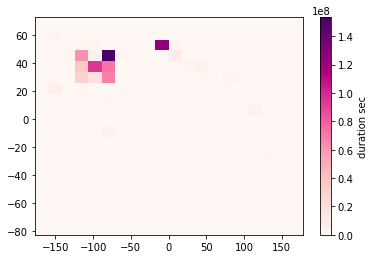

In [13]:
plt.hist2d(ufos['longitude'], ufos['latitude'], weights=ufos['duration_seconds'], 
          bins=20, cmap='RdPu')
cb = plt.colorbar()
cb.set_label('duration sec')

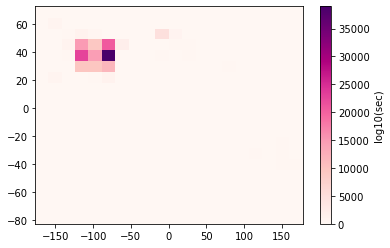

In [14]:
plt.hist2d(ufos['longitude'], ufos['latitude'], weights=np.log10(ufos['duration_seconds']), # doing the binning with logs
          bins=20, cmap='RdPu')
cb = plt.colorbar()
cb.set_label('log10(sec)')

In [15]:
import matplotlib.colors as mpl_colors

In [75]:
mpl_colors.SymLogNorm?

C:\Users\rohit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


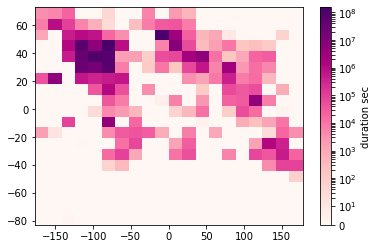

In [16]:
plt.hist2d(ufos['longitude'], ufos['latitude'], weights=ufos['duration_seconds'], 
          bins=20, cmap='RdPu', norm=mpl_colors.SymLogNorm(10)) # a little reminder about norm of colorspace
cb = plt.colorbar() # want colorbar to be in log-space
cb.set_label('duration sec')

Here: histogram the data "by hand" and feed this into bqplot.

In [17]:
nlong = 20
nlat = 20

hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], ufos['latitude'], 
                                              weights=ufos['duration_seconds'], 
                                              bins=[nlong, nlat])

In [18]:
hist2d.shape

(20, 20)

In [19]:
hist2d.min(), hist2d.max()

(0.0, 153348519.88)

Because I already have gridded data, the matplotlib function I want to use is imshow instead of hist2d:

C:\Users\rohit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


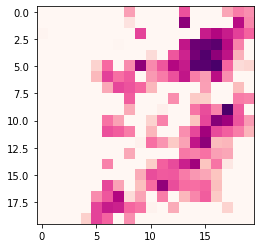

In [20]:
plt.imshow(hist2d, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))

C:\Users\rohit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


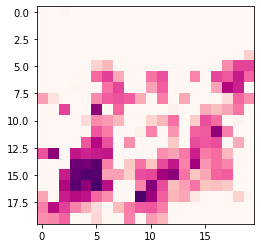

In [21]:
plt.imshow(hist2d.T, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))

A little weirdness -- bqplot actually expects this transposed (upside down) dataset!

In [22]:
hist2d.shape

(20, 20)

In [23]:
long_edges.shape

(21,)

In [24]:
lat_edges.shape

(21,)

In [25]:
long_centers = (long_edges[:-1] + long_edges[1:])/2 # 30% on this is totally fine!

In [26]:
long_edges

array([-176.6580556 , -158.90305782, -141.14806004, -123.39306226,
       -105.63806448,  -87.8830667 ,  -70.12806892,  -52.37307114,
        -34.61807336,  -16.86307558,    0.8919222 ,   18.64691998,
         36.40191776,   54.15691554,   71.91191332,   89.6669111 ,
        107.42190888,  125.17690666,  142.93190444,  160.68690222,
        178.4419    ])

In [27]:
long_centers

array([-167.78055671, -150.02555893, -132.27056115, -114.51556337,
        -96.76056559,  -79.00556781,  -61.25057003,  -43.49557225,
        -25.74057447,   -7.98557669,    9.76942109,   27.52441887,
         45.27941665,   63.03441443,   80.78941221,   98.54440999,
        116.29940777,  134.05440555,  151.80940333,  169.56440111])

In [28]:
# specify the bins for each lat & long
long_bins = np.linspace(-150, 150, nlong+1)

In [29]:
long_bins

array([-150., -135., -120., -105.,  -90.,  -75.,  -60.,  -45.,  -30.,
        -15.,    0.,   15.,   30.,   45.,   60.,   75.,   90.,  105.,
        120.,  135.,  150.])

In [30]:
lat_bins = np.linspace(-40, 70, nlat+1)

In [31]:
lat_bins

array([-40. , -34.5, -29. , -23.5, -18. , -12.5,  -7. ,  -1.5,   4. ,
         9.5,  15. ,  20.5,  26. ,  31.5,  37. ,  42.5,  48. ,  53.5,
        59. ,  64.5,  70. ])

In [32]:
# use these bins to make my histogram
hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], ufos['latitude'], 
                                              weights=ufos['duration_seconds'],
                                              bins=[long_bins, lat_bins])

In [33]:
long_edges

array([-150., -135., -120., -105.,  -90.,  -75.,  -60.,  -45.,  -30.,
        -15.,    0.,   15.,   30.,   45.,   60.,   75.,   90.,  105.,
        120.,  135.,  150.])

In [34]:
long_centers = (long_edges[:-1] + long_edges[1:])/2 # 30% on this is totally fine!
lat_centers = (lat_edges[:-1] + long_edges[1:])/2
lat_centers


array([-87.5 , -77.25, -67.  , -56.75, -46.5 , -36.25, -26.  , -15.75,
        -5.5 ,   4.75,  15.  ,  25.25,  35.5 ,  45.75,  56.  ,  66.25,
        76.5 ,  86.75,  97.  , 107.25])

In [35]:
hist2d = hist2d.T

In [36]:
hist2d.shape

(20, 20)

In [37]:
hist2d.min(), hist2d.max()

(0.0, 125056847.51)

In [38]:
np.log10(hist2d.min())

C:\Users\rohit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-inf

In [39]:
# we are going to be a little tricky!
hist2d[hist2d <= 0] = np.nan # filtering operation

In [40]:
hist2dlog = np.log10(hist2d)

It turns out that even though we'll have NaN's in our dataset, bqplot will plot this as a black background in a GridHeatMap mark!

In [41]:
#hist2dlog
hist2dlog

array([[       nan,        nan,        nan,        nan,        nan,
        3.15836249, 4.95777963,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan, 2.78887512,        nan, 5.1441975 ],
       [       nan,        nan,        nan,        nan,        nan,
        4.21512208, 3.06818586,        nan,        nan,        nan,
               nan, 4.45993502, 4.45336421,        nan,        nan,
        3.78283081,        nan, 4.88131902, 3.06445799, 4.02816442],
       [       nan,        nan, 0.        ,        nan,        nan,
        3.8920946 , 4.78334607,        nan,        nan,        nan,
               nan, 4.42499591, 3.34635297,        nan,        nan,
               nan,        nan, 3.20139712, 4.39578055, 3.17897695],
       [       nan,        nan,        nan,        nan,        nan,
        3.68124124, 4.00121433, 4.08278537,        nan,        nan,
        2.07918125, 3.78426058,        nan, 3

In [42]:
# 1. Data -- WE DID A LOT HERE!!
# having to do a lot of pre-viz data formatting

# 2. Scales
col_sc = bqplot.ColorScale(scheme="RdPu", min=np.nanmin(hist2dlog), max=np.nanmax(hist2dlog)) 
x_sc = bqplot.LinearScale() # numerical, long
y_sc = bqplot.LinearScale() # numerical, lat

In [43]:
# 3. Axis -- for colors, the axis is a colorbar!
ax_col = bqplot.ColorAxis(scale = col_sc, orientation='vertical', side='right') 
ax_x = bqplot.Axis(scale = x_sc, label='Longitude') # same x/y ax we had before
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical', label='Latitude')


In [52]:
# 4. Mark -- heatmap
heat_map = bqplot.GridHeatMap(color = hist2dlog, 
                              row = lat_centers,
                              column = long_centers,
                              scales = {'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'},
                             selected_style={'opacity':1.0},
                             unselected_style={'opacity':0.8})


In [53]:
# figure!
fig = bqplot.Figure(marks=[heat_map], axes=[ax_col, ax_y, ax_x])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(max=8.09710747658943, min=0.0, scheme='RdPu'),…

In [44]:
# 1. Data -- WE DID A LOT HERE!!
# having to do a lot of pre-viz data formatting

# 2. Scales
col_sc = bqplot.ColorScale(scheme="RdPu", min=np.nanmin(hist2dlog), max=np.nanmax(hist2dlog)) 
x_sc = bqplot.LinearScale() # numerical, long
y_sc = bqplot.LinearScale() # numerical, lat

# 3. Axis -- for colors, the axis is a colorbar!
ax_col = bqplot.ColorAxis(scale = col_sc, orientation='vertical', side='right') 
ax_x = bqplot.Axis(scale = x_sc, label='Longitude') # same x/y ax we had before
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical', label='Latitude')

# 4. Mark -- heatmap
heat_map = bqplot.GridHeatMap(color = hist2dlog, 
                              row = lat_centers,
                              column = long_centers,
                              scales = {'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'},
                             selected_style={'opacity':1.0},
                             unselected_style={'opacity':0.8})

# 5. interactivity
mySelectedLabel = ipywidgets.Label()
def on_selected(change): # already modified for our 3d data
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = hist2dlog[i,j] # this is a 2d array!!
        mySelectedLabel.value = 'Weighted binning (log(duration in sec)) = ' + str(v)
        ##### Add in what changes for our histogram
        ####hist.sample = data3d[i,j]
# make sure we are observing for changes in our heatmap
heat_map.observe(on_selected, 'selected')
        
# figure!
fig = bqplot.Figure(marks=[heat_map], axes=[ax_col, ax_y, ax_x])
#fig

# dashboard with my label
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard

In [100]:
ufos.head()

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


We binned our data, *but* if we want to make another plot with data in another axis of our original set (distribution of durations).

In [103]:
i, j = 19, 0 # I know this has lots of data!

In [106]:
region_mask = ( (ufos['latitude'] >= lat_edges[j]) & (ufos['latitude'] <= lat_edges[j+1]) & \
              (ufos['longitude'] >= long_edges[i]) & (ufos['longitude'] <= long_edges[i+1]))

In [107]:
ufos['latitude'][region_mask]

112     -34.928661
682     -37.653829
855     -34.928661
998     -37.813938
1850    -37.966667
           ...    
76956   -37.883333
78037   -34.928661
78381   -38.382766
78598   -35.276030
80217   -37.813938
Name: latitude, Length: 211, dtype: float64

In [108]:
lat_edges[j], lat_edges[j+1]

(-40.0, -34.5)

In [111]:
# example: I want to make a histogram of the duration_seconds in this particular bin
# hist.sample = ufos['duration_seconds'][region_mask].values

ufos['duration_seconds'][region_mask].values

array([6.00e+02, 4.00e+01, 3.00e+02, 9.00e+02, 6.00e+02, 1.50e+03,
       1.20e+02, 5.00e+00, 9.00e+02, 3.00e+01, 1.80e+02, 3.60e+02,
       6.00e+02, 1.20e+02, 6.00e+01, 1.50e+01, 6.00e+02, 1.00e+01,
       3.00e+02, 3.00e+01, 6.00e+01, 7.00e+00, 3.20e+01, 3.00e+01,
       1.20e+03, 6.00e+02, 2.70e+03, 6.00e+01, 3.00e+00, 6.00e+01,
       6.00e+01, 1.80e+03, 2.40e+02, 3.60e+03, 9.00e+02, 5.00e+00,
       3.60e+03, 1.50e+01, 6.00e+02, 6.00e+01, 6.00e+01, 6.00e+02,
       2.40e+02, 3.00e+02, 3.00e+02, 6.00e+02, 3.00e+02, 6.00e+02,
       7.20e+03, 1.80e+02, 6.00e+01, 6.00e+01, 9.00e+02, 3.00e+02,
       1.80e+02, 2.70e+03, 3.00e+02, 1.00e+00, 6.00e+02, 3.00e+01,
       3.60e+03, 6.00e+01, 1.80e+02, 5.00e+00, 6.00e+01, 3.00e+01,
       1.20e+02, 1.00e+01, 1.50e+01, 5.00e-01, 3.00e+02, 4.80e+02,
       9.00e+01, 1.80e+02, 1.20e+02, 1.20e+03, 3.00e+02, 6.00e+02,
       7.20e+02, 1.00e+01, 3.00e+02, 2.40e+03, 6.00e+02, 6.00e+02,
       4.20e+02, 9.00e+02, 1.08e+04, 1.80e+02, 2.00e+01, 1.00e

In [123]:
# few possibly useful things for this dataset!
# ... shoulda come to class ;)